In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/Celty1208/schulich_data_science/main/Week%201%20data_messy_data.csv")
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2
103,21,NaN,Male,B,2


In [4]:
df.info()
# find missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       105 non-null    int64  
 1   Income    94 non-null     float64
 2   Gender    105 non-null    object 
 3   Product   100 non-null    object 
 4   Quantity  105 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


In [7]:
df.describe(include="all")
# count= nun-null values, unique=kinds
# min, max = see any outliers

,Age,Income,Gender,Product,Quantity
count,105.000000,94.000000,105,100,105.00000
unique,NaN,NaN,2,4,NaN
top,NaN,NaN,Female,D,NaN
freq,NaN,NaN,58,28,NaN
mean,42.076190,52867.862808,NaN,NaN,3.20000
std,15.940813,29896.579420,NaN,NaN,1.44382
min,18.000000,20901.331720,NaN,NaN,1.00000
25%,31.000000,37814.315255,NaN,NaN,2.00000
50%,41.000000,48760.369705,NaN,NaN,3.00000
75%,55.000000,61644.277868,NaN,NaN,5.00000


In [13]:
import seaborn as sns

<Axes: xlabel='Income', ylabel='Count'>

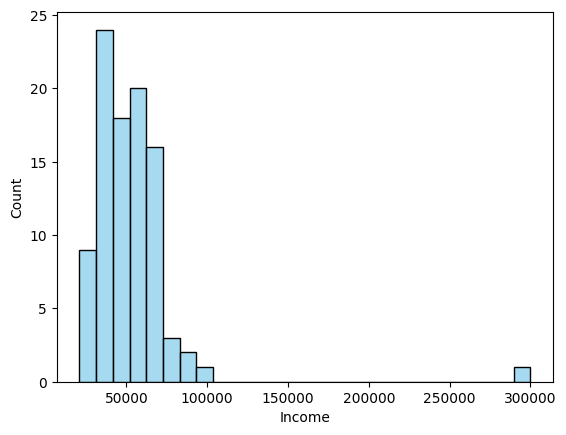

In [24]:
sns.histplot(df["Income"], color="skyblue")
#histgram: frequency plot

<Axes: >

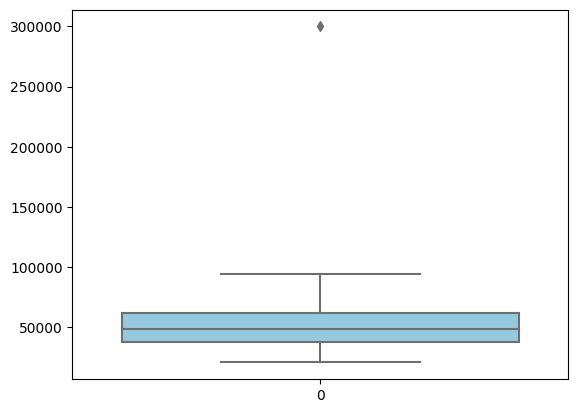

In [25]:
sns.boxplot(df["Income"], color="skyblue")
# easy to see outliers

In [28]:
# write a statment to filter the dataset and identify the outlier
df[df["Income"]==300000]
#shows that the index=99

,Age,Income,Gender,Product,Quantity
99,61,300000.0,Male,B,4


In [29]:
df.drop(99, axis=0, inplace=True)
#outlier dropped

<Axes: >

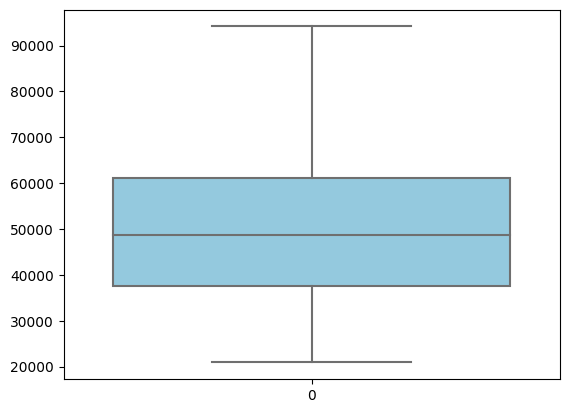

In [33]:
sns.boxplot(df["Income"], color="skyblue")

<Axes: xlabel='Income', ylabel='Count'>

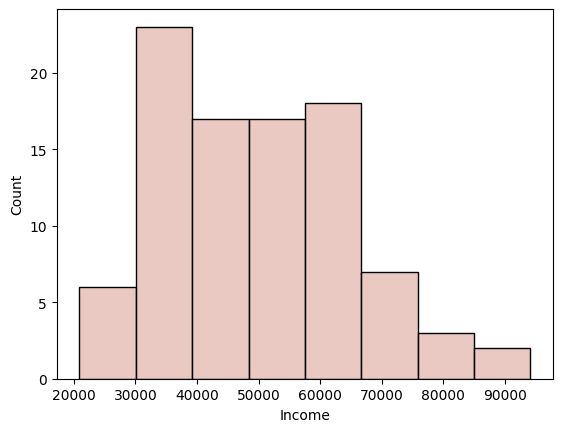

In [42]:
hex_color = "#E2B7AE"
rgb_color = tuple(int(hex_color[i:i+2], 16) / 255 for i in (1, 3, 5))
sns.histplot(df["Income"],color=rgb_color)

<Axes: xlabel='Gender', ylabel='Income'>

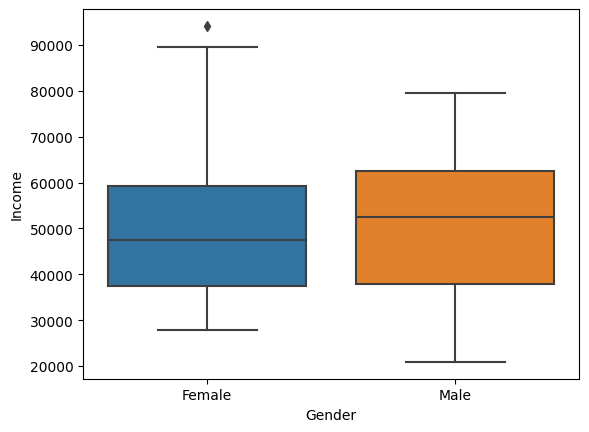

In [36]:
sns.boxplot(data=df, x="Gender", y="Income")

<Axes: xlabel='Age', ylabel='Income'>

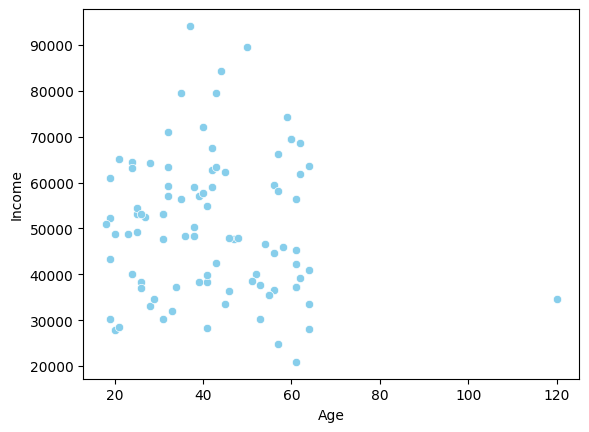

In [39]:
sns.scatterplot(data=df,x="Age", y="Income",color="skyblue")

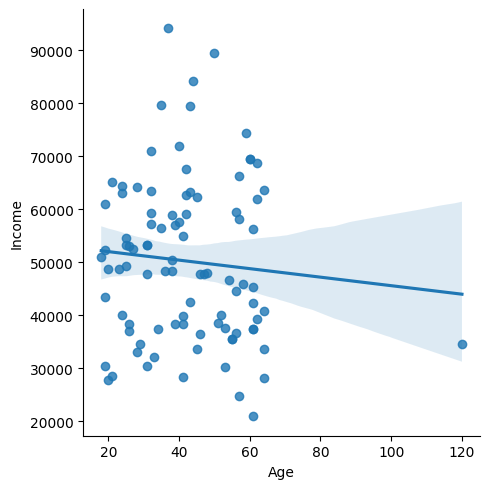

In [41]:
sns.lmplot(data=df, x="Age", y="Income", fit_reg=True)

In [44]:
df.drop(df[df["Age"]==120].index, axis=0, inplace=True)
#drop the age=120 row

In [45]:
df[df["Age"]==56].index
#show the index number

Index([0, 6, 41], dtype='int64')

In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       98 non-null     int64  
 1   Income    88 non-null     float64
 2   Gender    98 non-null     object 
 3   Product   93 non-null     object 
 4   Quantity  98 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ KB


In [48]:
df["Product"]=df['Product'].fillna("Other")
#fill the null cells using this

In [51]:
df.groupby('Gender')['Income'].mean()
#mean income, group by gender

Gender
Female    50205.793962
Male      50795.175595
Name: Income, dtype: float64

In [54]:
df["Income"]=df['Income'].fillna(df["Income"].mean())